# Notebook Imports

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline


In [3]:
boston_data = load_boston()

In [4]:
boston_data.data.shape

(506, 13)

In [5]:
type(boston_data)

sklearn.utils.Bunch

In [6]:
dir(boston_data) 

['DESCR', 'data', 'feature_names', 'target']

In [7]:
print(boston_data.DESCR) # Exploring data trying to understand where does is come from. What are features,size and etc

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
type(boston_data.data)

numpy.ndarray

## Cleaning our data

In [10]:
data = pd.DataFrame(data=boston_data.data,columns = boston_data.feature_names)

data['PRICE'] = boston_data.target

In [11]:
data.head()
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [12]:
# Checking for Missing Values through Pandas function

#pd.isnull(data) 

pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info() # Checking for Missing values using info() method from Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualizing Data - Histogram,Distribution and Bar Charts

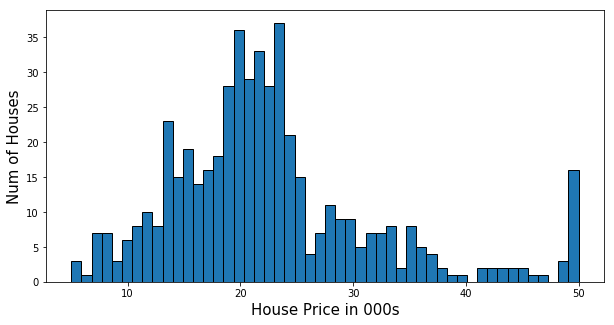

In [14]:
plt.figure(figsize=[10,5])
plt.hist(data['PRICE'],bins=50,ec='black')
plt.xlabel('House Price in 000s',size=15)
plt.ylabel('Num of Houses',size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


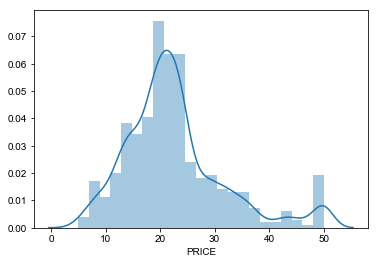

In [15]:
sns.distplot(data['PRICE'])
sns.set_style('whitegrid')
plt.show()

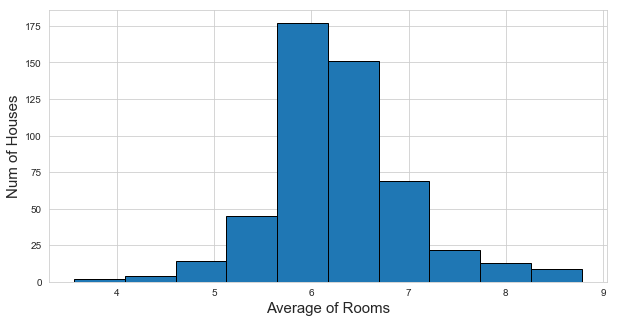

In [16]:
plt.figure(figsize=[10,5])
plt.hist(data['RM'],ec='black')
plt.xlabel('Average of Rooms',size=15)
plt.ylabel('Num of Houses',size=15)
plt.show()

In [17]:
data['RM'].mean()


6.284634387351787

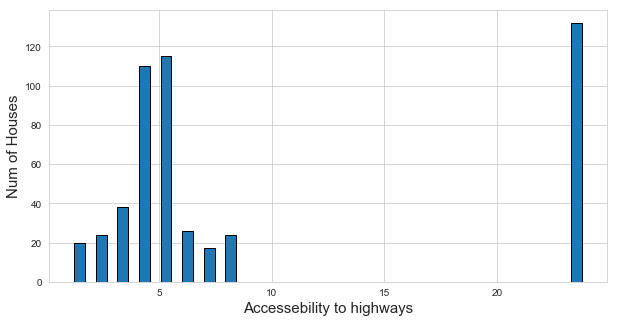

In [18]:
plt.figure(figsize=(10,5))
plt.hist(data['RAD'],bins=24,ec='black',rwidth=0.5)
plt.xlabel('Accessebility to highways',size=15)
plt.ylabel('Num of Houses',size=15)
plt.show()

In [19]:
freq = data['RAD'].value_counts()

In [20]:
freq.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

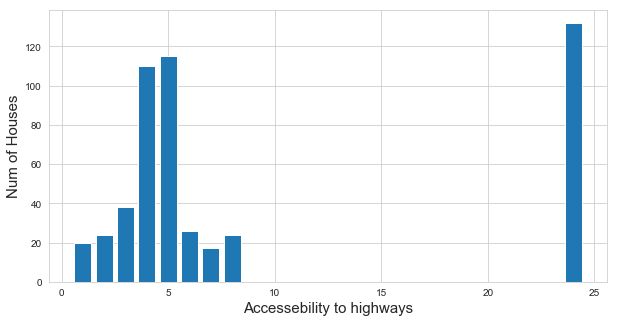

In [21]:
plt.figure(figsize=(10,5))
plt.bar(freq.index,freq)
plt.xlabel('Accessebility to highways',size=15)
plt.ylabel('Num of Houses',size=15)
plt.show()

# Descriptive Statistics

In [22]:
data['PRICE'].min() # Give minimum only from 1 column
data['PRICE'].max() # Give maximum only from 1 column


50.0

In [23]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Correlation

## $$ \rho_(xy) = corr(X,Y) $$
## $$ -1.0 \leq \rho_(xy) \leq +1.0 $$

In [24]:
data['PRICE'].corr(data['RM'])

0.6953599470715391

In [25]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [26]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.452220 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.385832  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.377904  0.622029  0.579564  0.288250 -0.377365  0.452220 -0.385832  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [27]:
mask = np.zeros_like(data.corr())
tri_indices = np.triu_indices_from(mask)
mask[tri_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

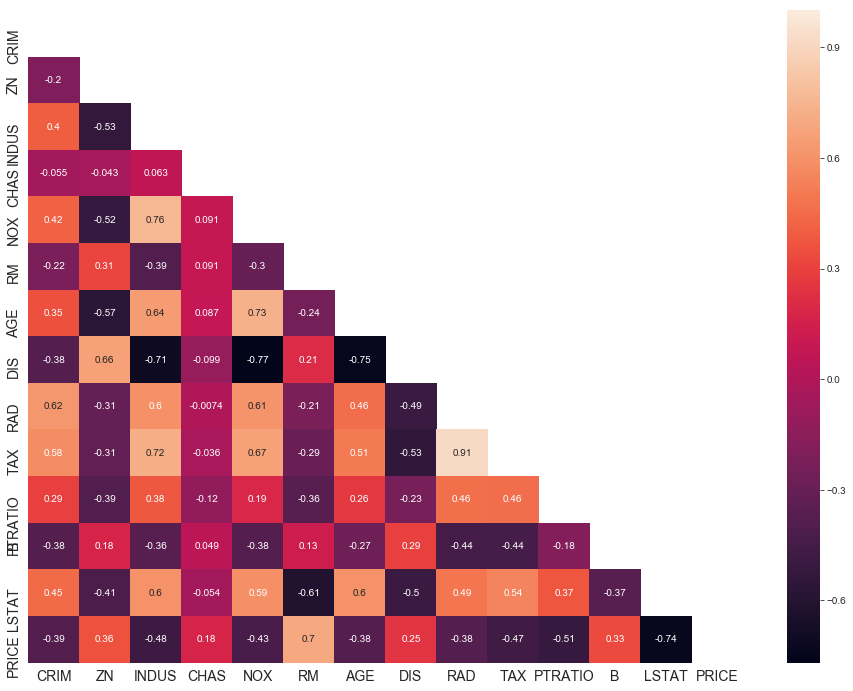

In [28]:
# Plotting a Heat map to understand the Coefficient of correlation among all features
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),mask=mask,annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [29]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
nox_dis_corr

-0.769

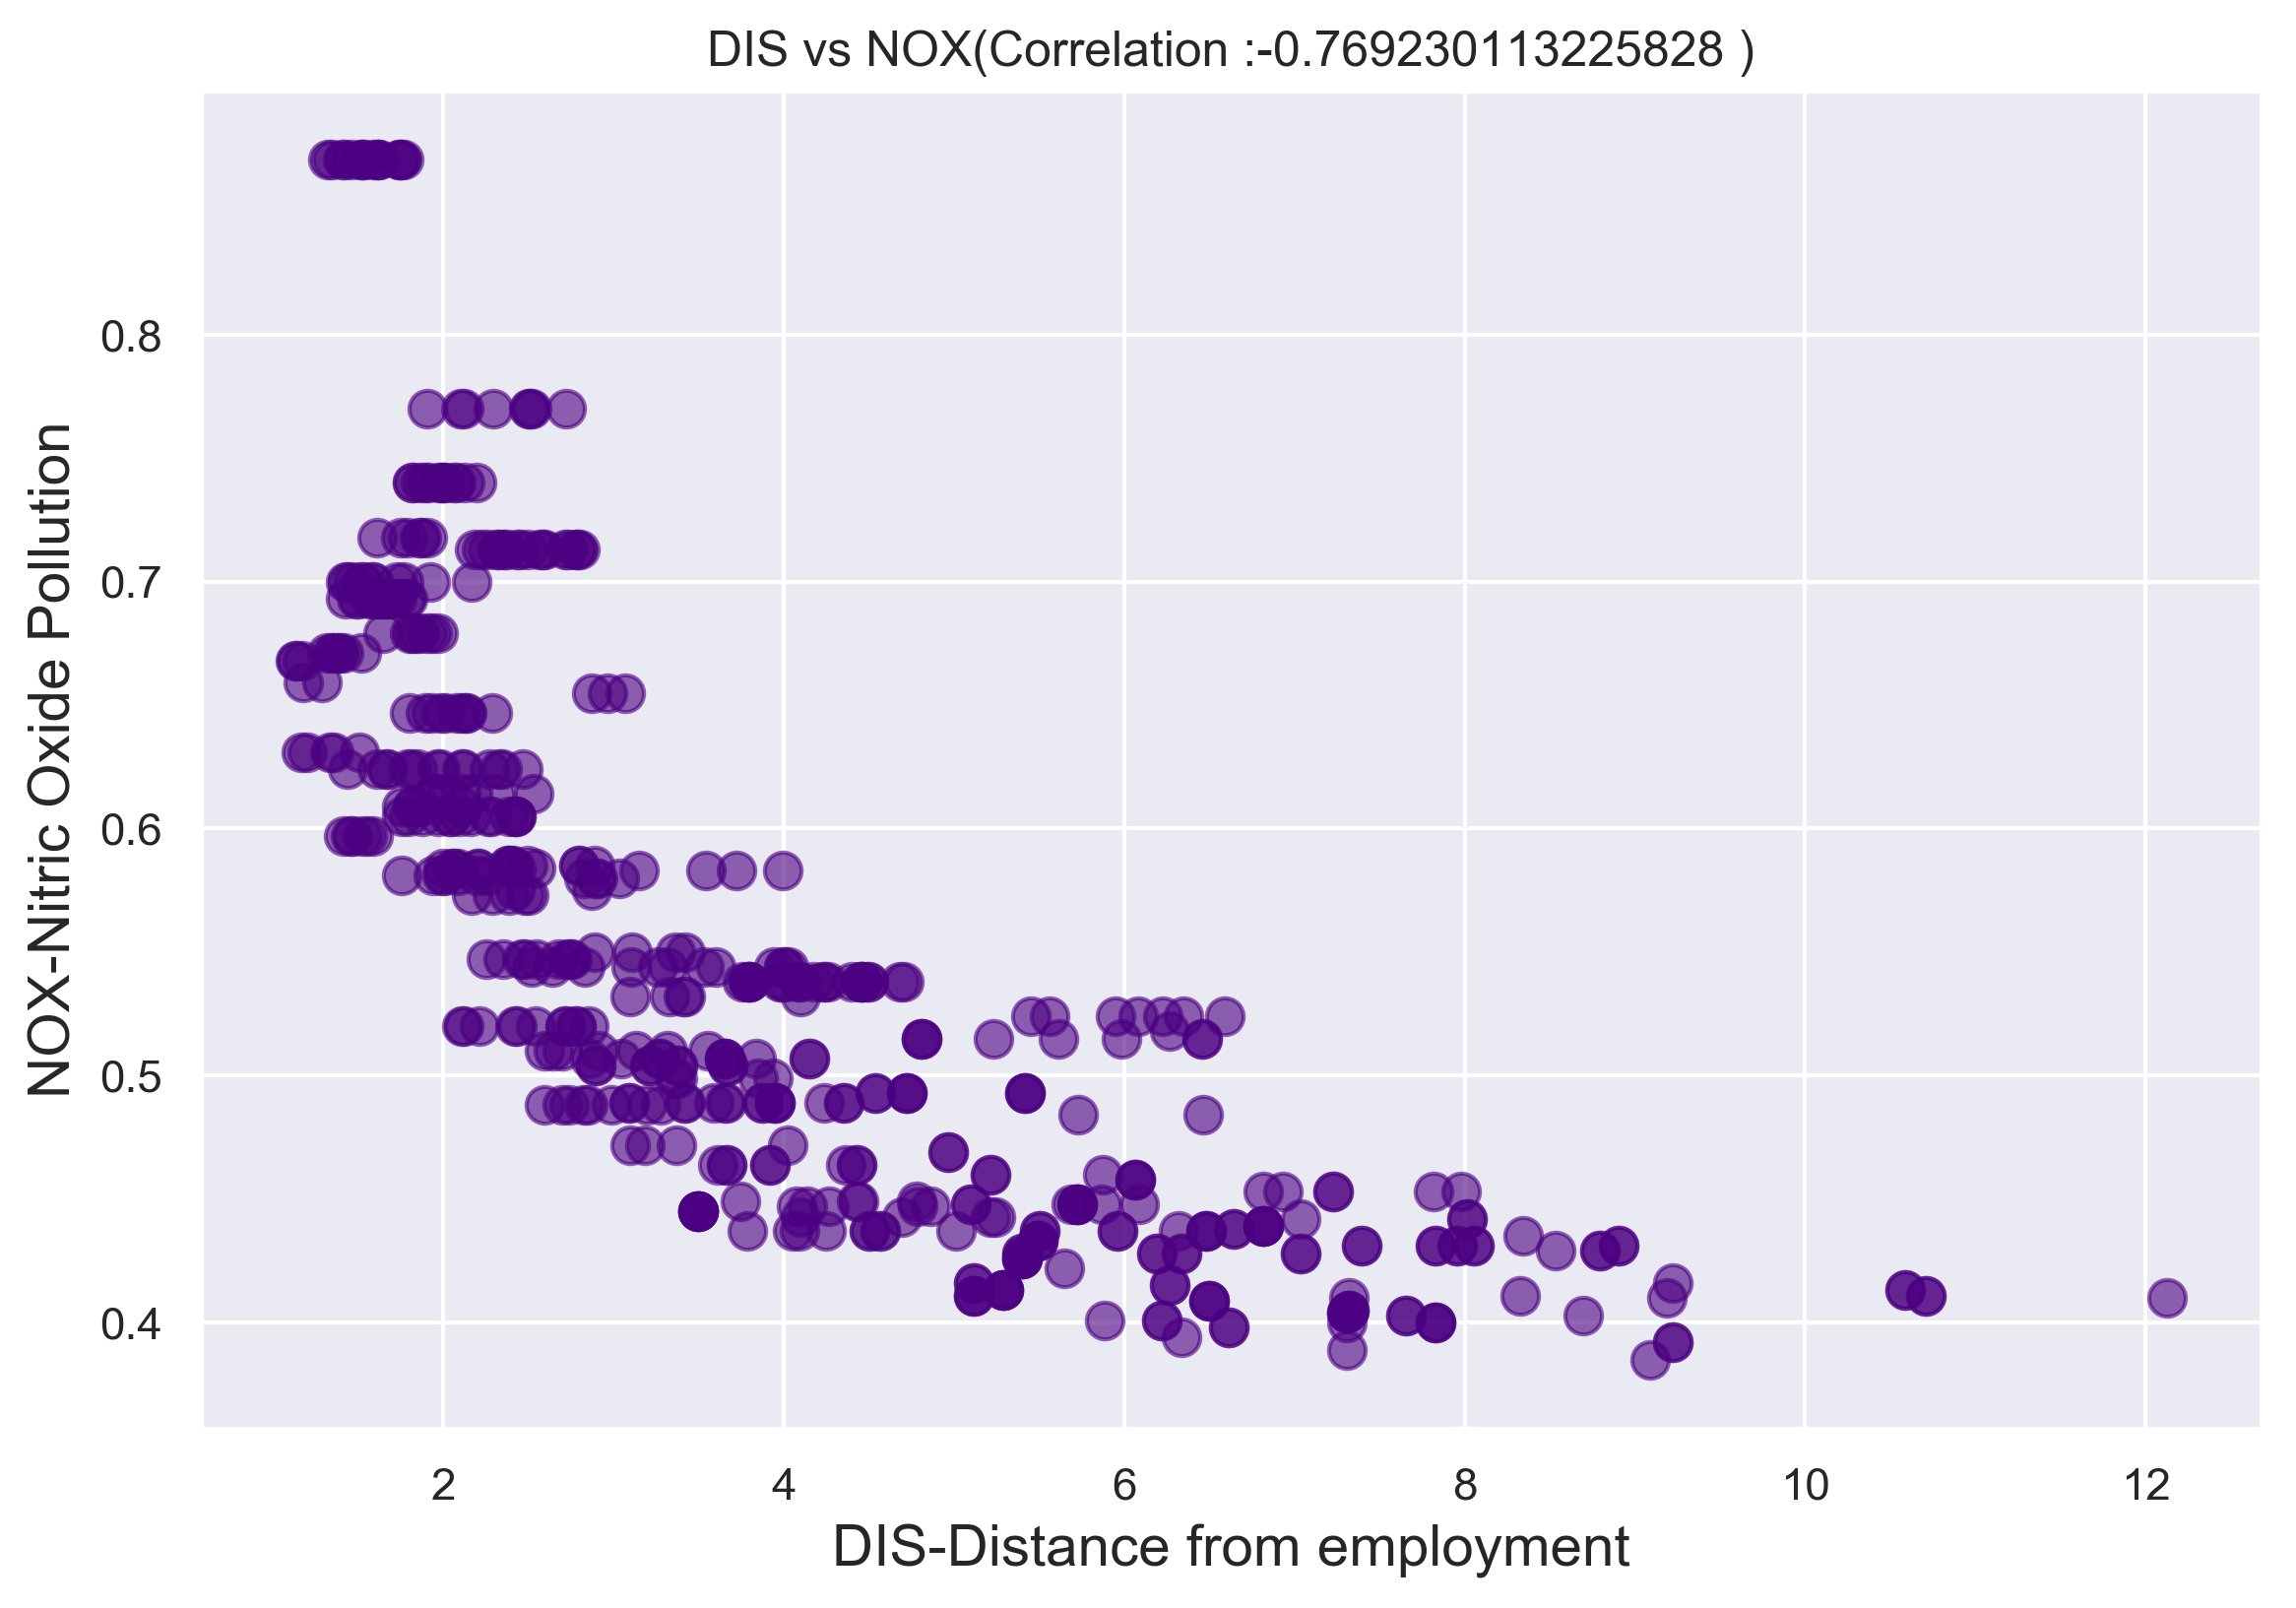

In [30]:
sns.set()
plt.figure(figsize=(9,6),dpi=300)
plt.title(f"DIS vs NOX(Correlation :{data['NOX'].corr(data['DIS'])} )")
plt.scatter(data['DIS'],data['NOX'],s=80,color='indigo',alpha=0.6)
plt.xlabel("DIS-Distance from employment",fontsize=14)
plt.ylabel("NOX-Nitric Oxide Pollution",fontsize=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


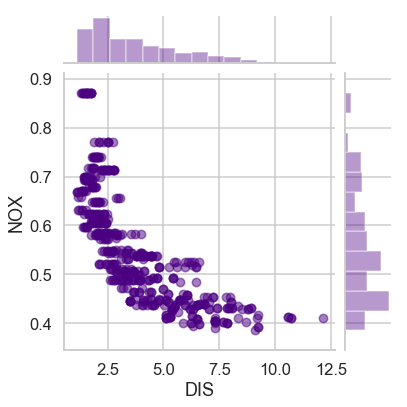

In [31]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x='DIS',y='NOX',data=data,s=70,color='indigo',joint_kws={'alpha':0.5})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


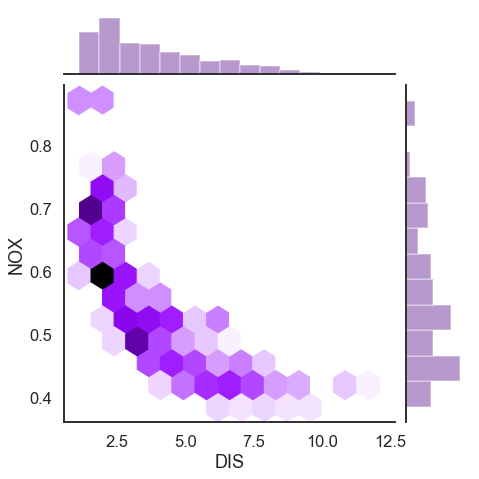

In [32]:
sns.set()
sns.set_context('talk')
sns.set_style('white')
sns.jointplot(x='DIS',y='NOX',data=data,kind="hex",size=7,color='indigo')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


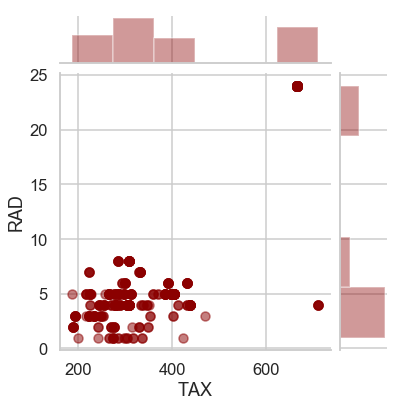

In [33]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x='TAX',y='RAD',data=data,color='darkred',joint_kws={'alpha':0.5})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


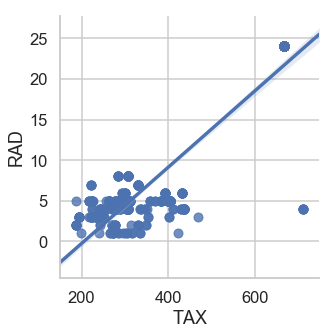

In [34]:
sns.lmplot(x='TAX',y='RAD',data=data)
plt.show()

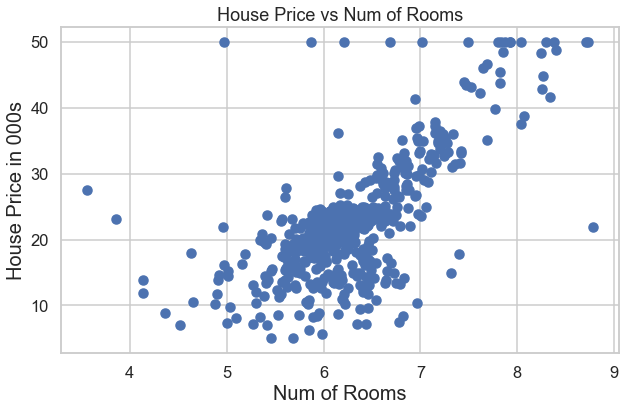

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(data['RM'],data['PRICE'])
plt.title("House Price vs Num of Rooms")
plt.xlabel("Num of Rooms",fontsize=20)
plt.ylabel("House Price in 000s",fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


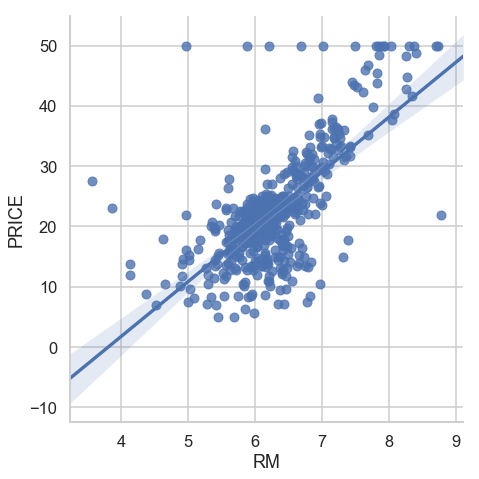

In [36]:
sns.lmplot(x='RM',y='PRICE',data=data,height=7)
plt.show()

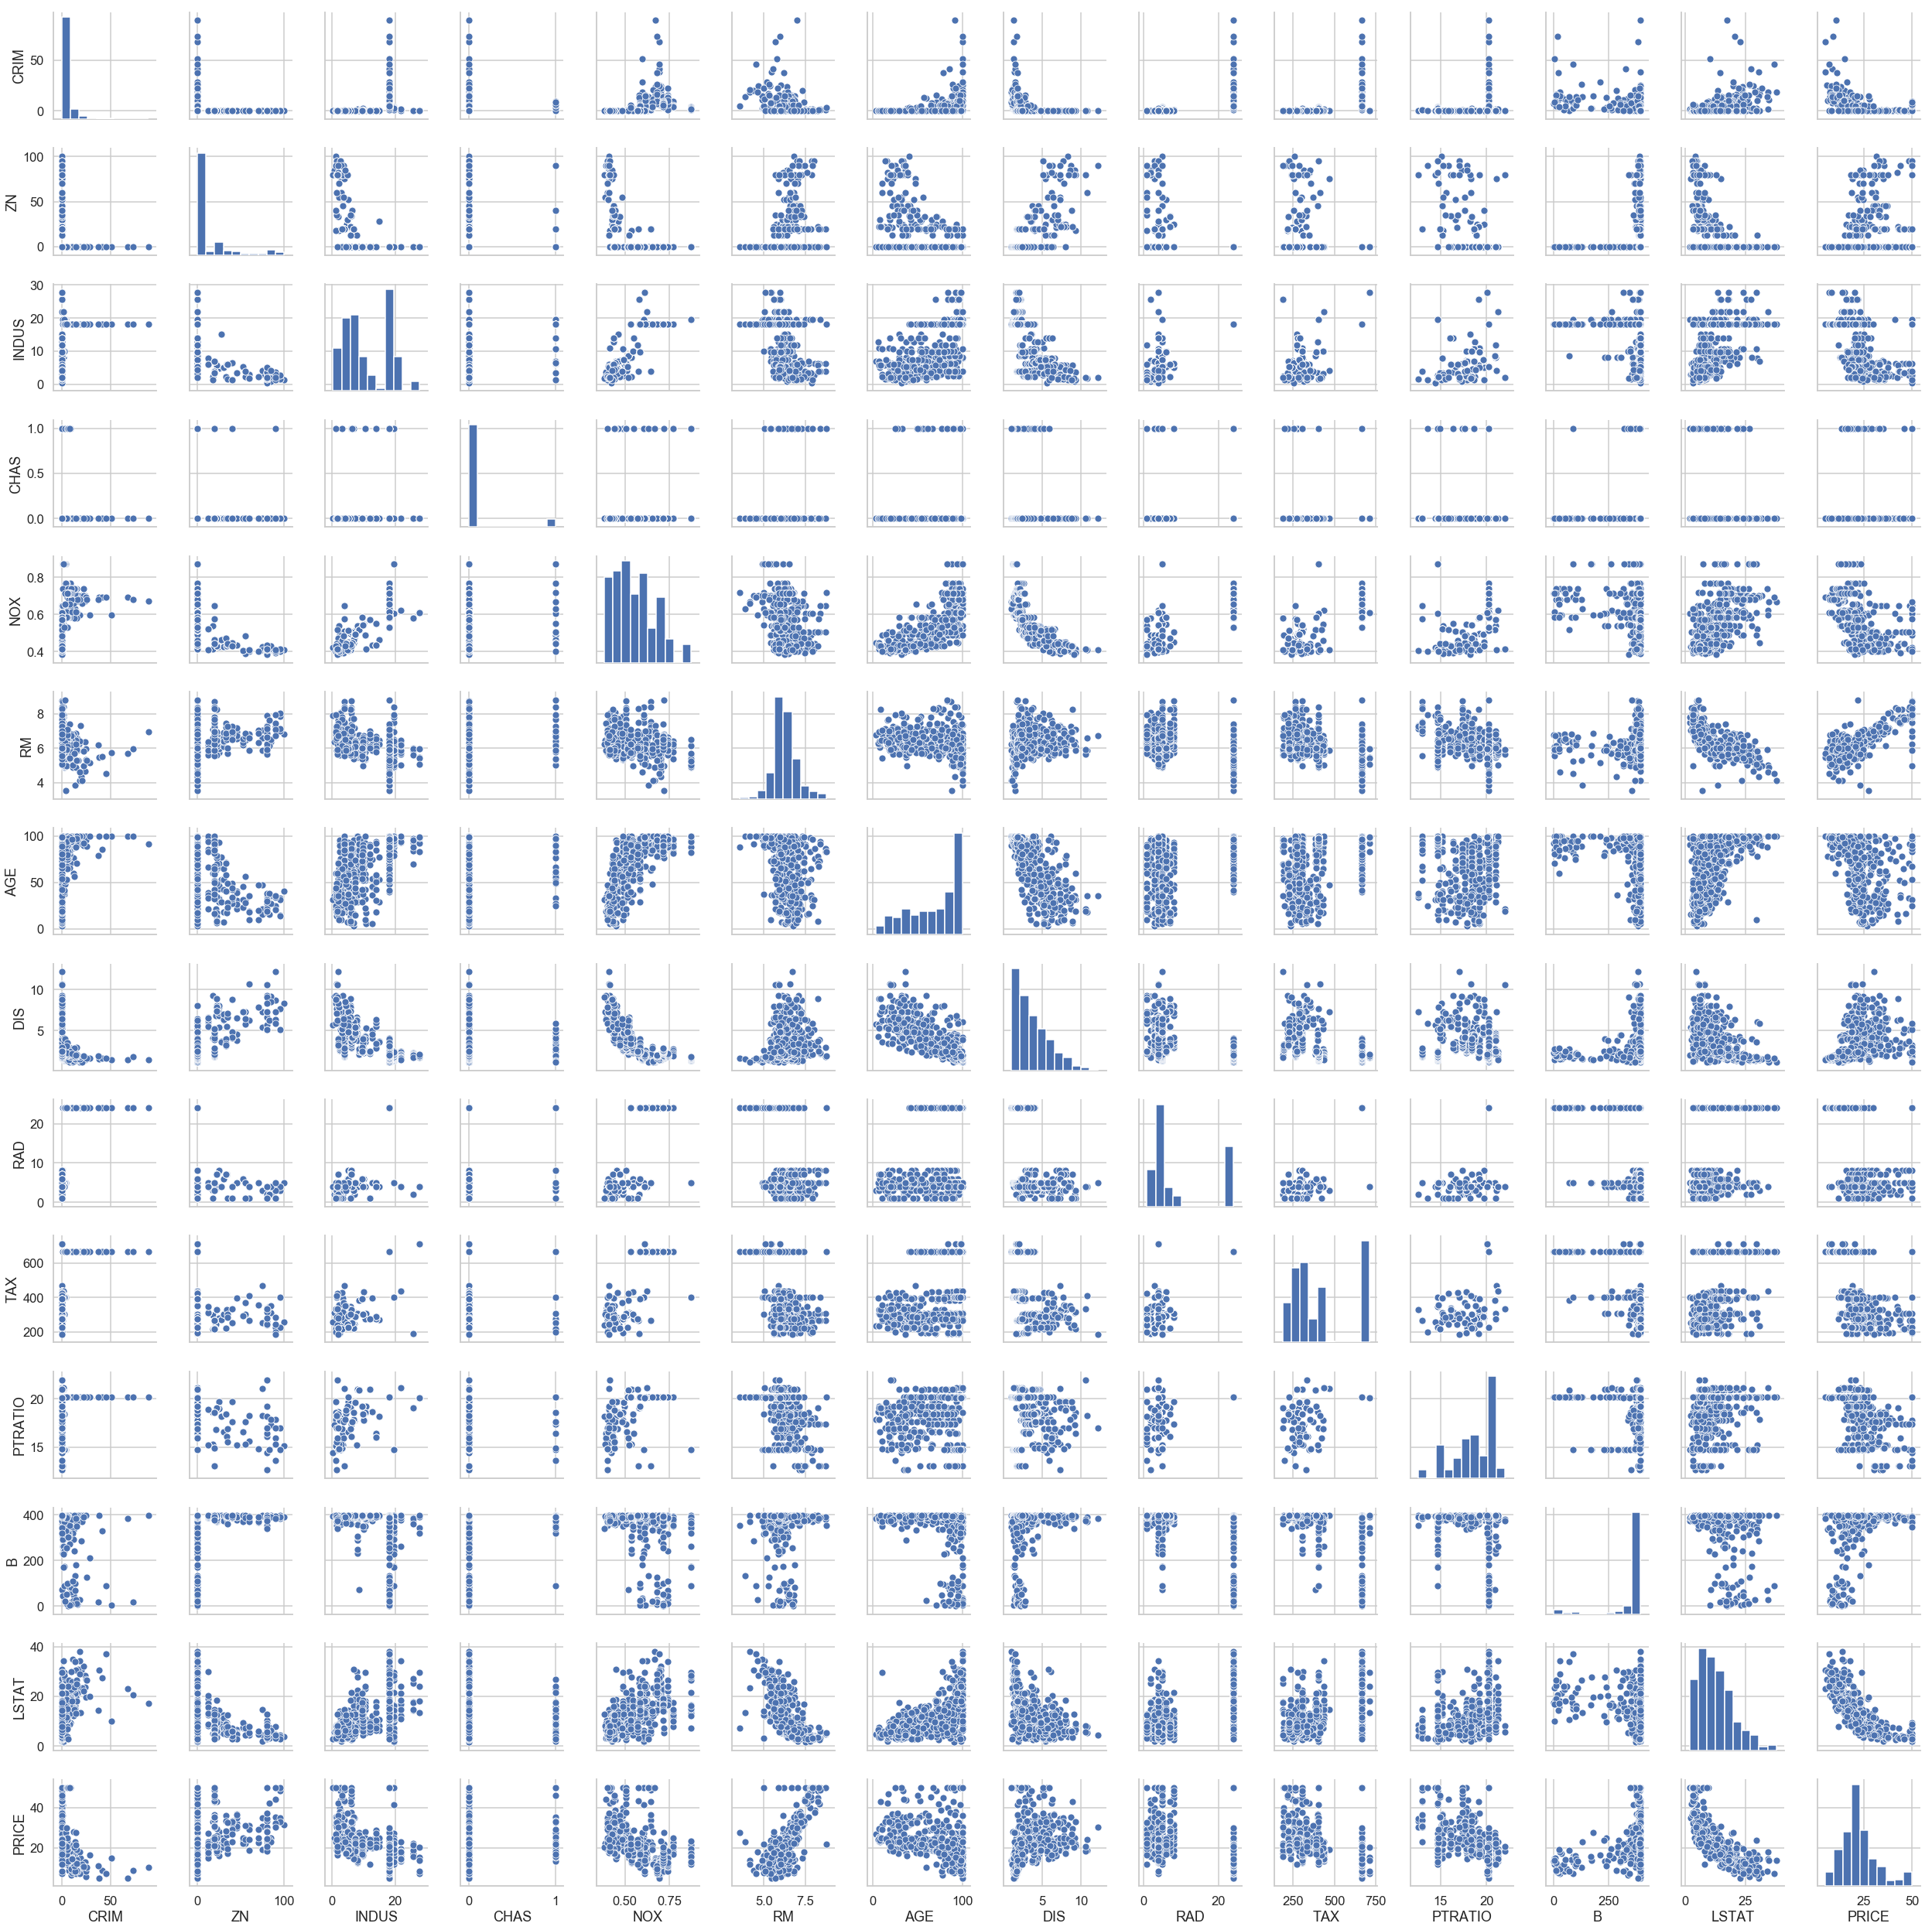

Wall time: 57.2 s


In [37]:
%%time

sns.pairplot(data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


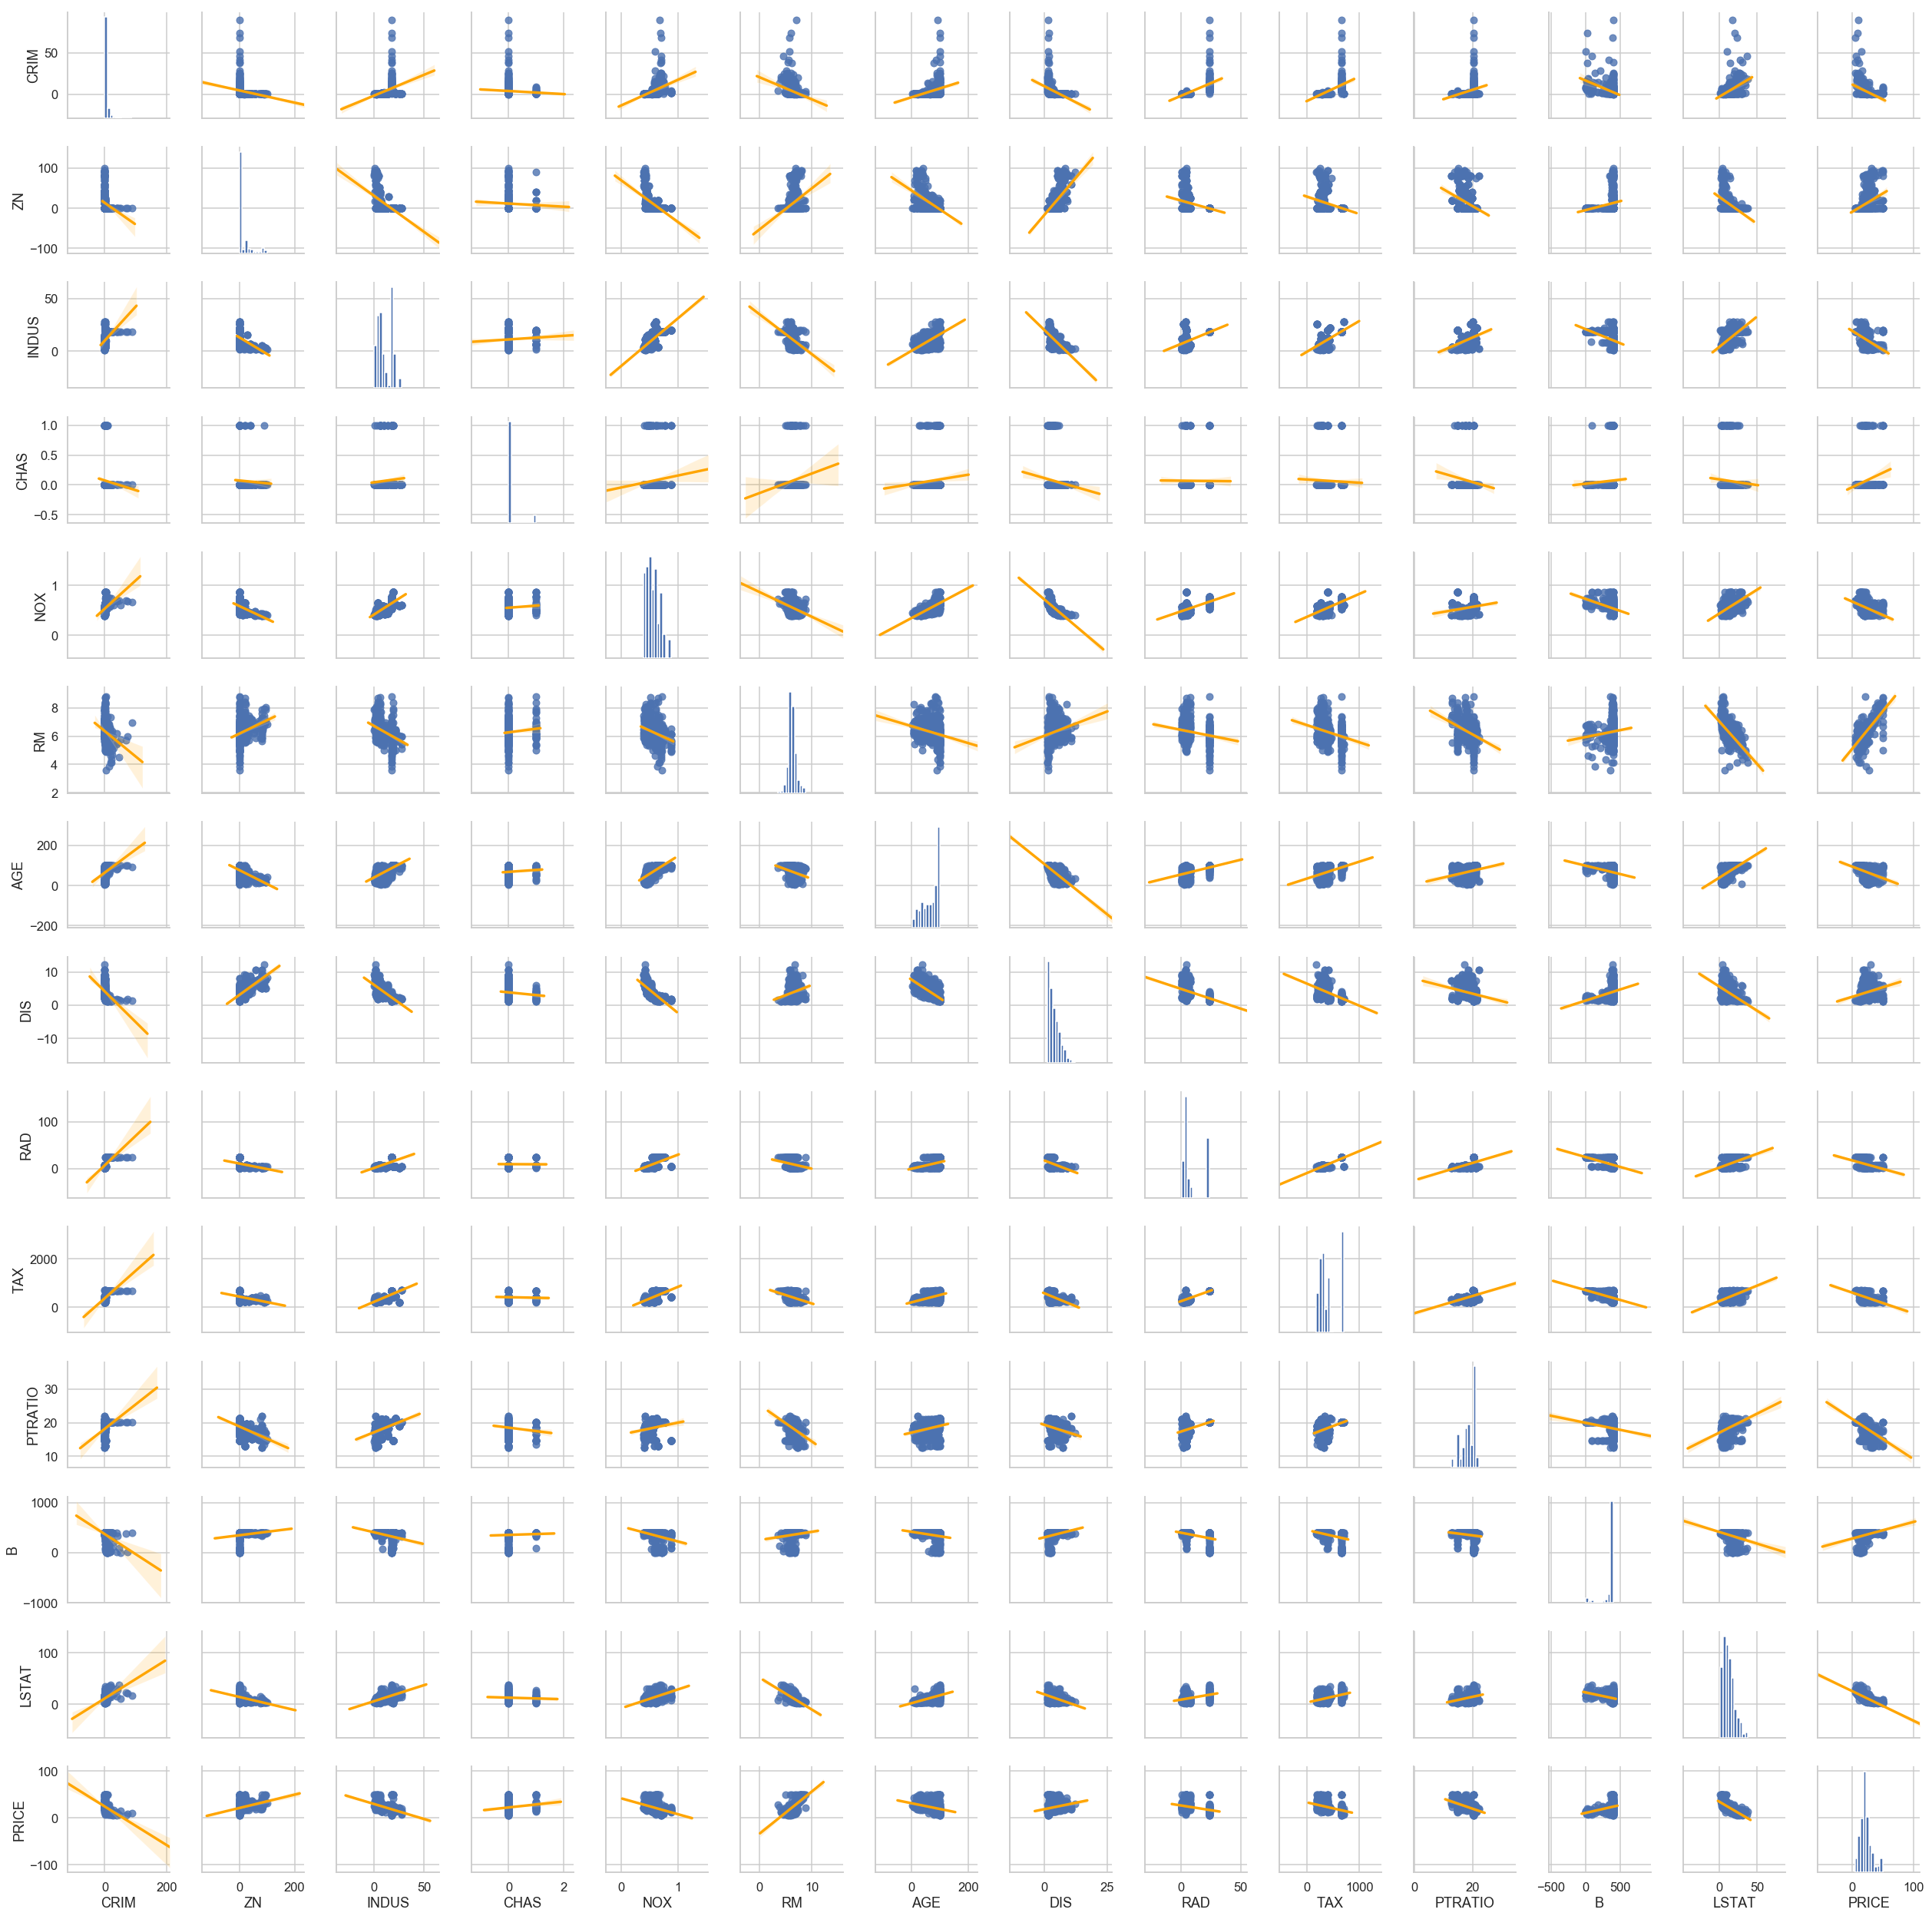

Wall time: 1min 29s


In [38]:
%%time
# Pair plot with Linear regression line
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'orange'}})
plt.show()

# Training and Test Data Split

In [39]:
prices = data['PRICE']
features = data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

# Checking % of training data
len(X_train)/len(features)


0.7984189723320159

# Multivariable Linear Regression

In [40]:
regr = LinearRegression()
regr.fit(X_train,y_train)

print("R-squared value for Training Dataset:",regr.score(X_train,y_train))
print("R-squared value for Test Dataset:",regr.score(X_test,y_test))

R-squared value for Training Dataset: 0.7501462670128084
R-squared value for Test Dataset: 0.6706419566528593


In [41]:
print("Intercept for our model:",regr.intercept_)
#print("Coefficients for our model:",regr.coef_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['Coef'])

Intercept for our model: 36.58872303665089


Coef
CRIM     -0.127691
ZN        0.063186
INDUS    -0.007134
CHAS      1.976156
NOX     -16.318740
RM        3.100873
AGE       0.016391
DIS      -1.483701
RAD       0.303792
TAX      -0.012076
PTRATIO  -0.821412
B         0.011520
LSTAT    -0.582565

# Data Transformation

In [42]:
data['PRICE'].skew() # Check for Skewness in our Prices

1.1080984082549072

In [43]:
# Will transform our Data using Log Transformation
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [44]:
y_log.skew() # Before Log transformation skew was 1.1080984082549072 # Skew close to Zero is better

-0.33032129530987864

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


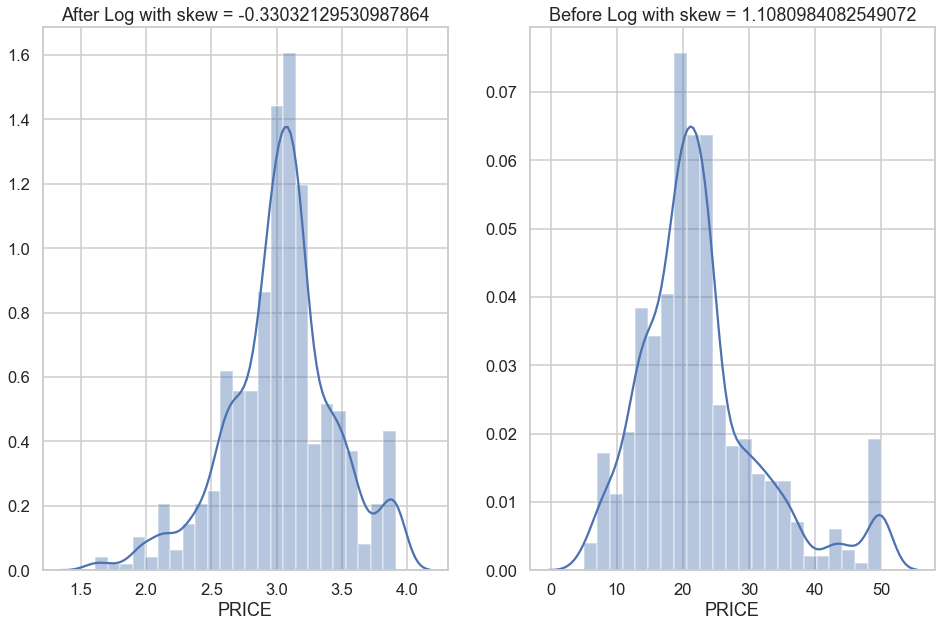

In [45]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.title(f"After Log with skew = {y_log.skew()}")
sns.distplot(y_log)

plt.subplot(1,2,2)
sns.distplot(data['PRICE'])
plt.title(f"Before Log with skew = {data['PRICE'].skew()}")

plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


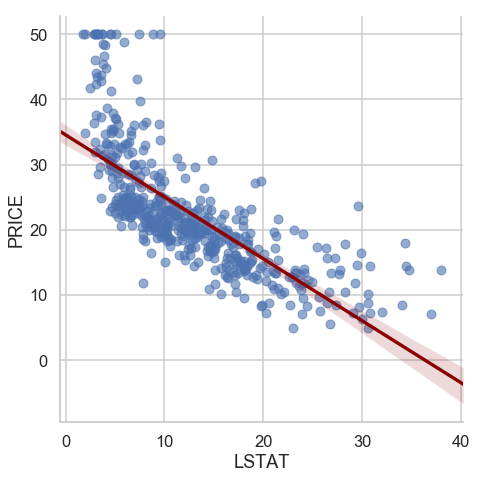

In [46]:
sns.lmplot(x='LSTAT',y='PRICE',data=data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


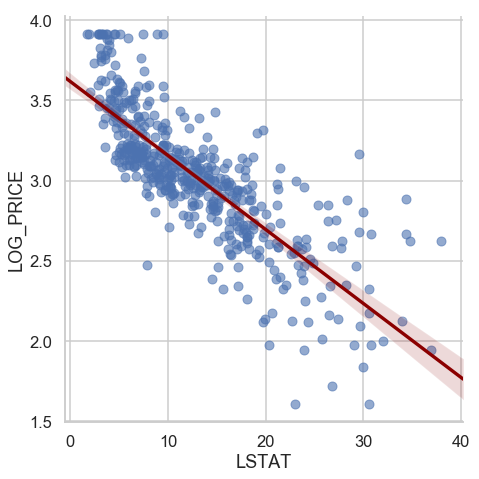

In [47]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})
plt.show()



# Regression using Log Transformation

In [48]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2,random_state = 10)

regr = LinearRegression().fit(X_train,y_train)

print("Training data r-squared:",regr.score(X_train,y_train))
print("Test data r-squared:",regr.score(X_test,y_test))

print("Intercept:",regr.intercept_)
pd.DataFrame(data = regr.coef_,index=features.columns,columns=['Coef'])
# Everything will be in Log to Get the actual value, we need to get the exponential
# Can use numpy method via np.e


Training data r-squared: 0.7930775338477335
Test data r-squared: 0.744060833280723
Intercept: 4.064537049090892


Coef
CRIM    -0.010627
ZN       0.001578
INDUS    0.002067
CHAS     0.080475
NOX     -0.707931
RM       0.072775
AGE      0.000771
DIS     -0.047687
RAD      0.014546
TAX     -0.000645
PTRATIO -0.034887
B        0.000524
LSTAT   -0.031469

# p values and Evaluating Coefficients

In [49]:
X_inc_cons = sm.add_constant(X_train)

model = sm.OLS(y_train,X_inc_cons)
results = model.fit()
results.params # Returns the Coefficient
results.pvalues # Return P Values

pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})


coef  p-values
const    4.064537     0.000
CRIM    -0.010627     0.000
ZN       0.001578     0.009
INDUS    0.002067     0.436
CHAS     0.080475     0.038
NOX     -0.707931     0.000
RM       0.072775     0.000
AGE      0.000771     0.204
DIS     -0.047687     0.000
RAD      0.014546     0.000
TAX     -0.000645     0.000
PTRATIO -0.034887     0.000
B        0.000524     0.000
LSTAT   -0.031469     0.000

In [50]:
variance_inflation_factor(X_inc_cons.values,1)

1.695554652370898

In [51]:
len(X_inc_cons.columns)

14

In [52]:
vif = []
for i in range(len(X_inc_cons.columns)):
    vif.append(variance_inflation_factor(X_inc_cons.values,i))
vif

[597.7162494657529,
 1.695554652370898,
 2.3326946696785846,
 3.9427744981199018,
 1.0787469185934089,
 4.411684833571366,
 1.8408127178164948,
 3.326910064691547,
 4.2235617203895846,
 7.310219847487447,
 8.508756317985108,
 1.8400265376727638,
 1.3362314880772215,
 2.809017657830634]

In [53]:
pd.DataFrame({'Coef':X_inc_cons.columns,'Vif':np.around(vif,2)})

Coef     Vif
0     const  597.72
1      CRIM    1.70
2        ZN    2.33
3     INDUS    3.94
4      CHAS    1.08
5       NOX    4.41
6        RM    1.84
7       AGE    3.33
8       DIS    4.22
9       RAD    7.31
10      TAX    8.51
11  PTRATIO    1.84
12        B    1.34
13    LSTAT    2.81

# Model simplication and BIC

### BIC -> the Lower the Better

In [54]:
# Original model with log prices and all features
X_inc_cons = sm.add_constant(X_train)

model = sm.OLS(y_train,X_inc_cons)
results = model.fit()

org_coef = pd.DataFrame({'Coef':results.params,'p-value':round(results.pvalues,3)})
#org_coef
print("BIC is:",results.bic)
print("r-squared is",results.rsquared)



BIC is: -139.85549462958477
r-squared is 0.7930775338477335


In [55]:
# Reduced Model Excluding INDUS

X_inc_cons = sm.add_constant(X_train)
X_inc_cons = X_inc_cons.drop(['INDUS'],axis=1)

model = sm.OLS(y_train,X_inc_cons)
results = model.fit()

coef_ex_indus = pd.DataFrame({'Coef':results.params,'p-value':round(results.pvalues,3)})
#org_coef
print("BIC is:",results.bic)
print("r-squared is",results.rsquared)

BIC is: -145.22792357271516
r-squared is 0.7927551262006105


In [56]:
# Reduced Model Excluding INDUS and age both

X_inc_cons = sm.add_constant(X_train)
X_inc_cons = X_inc_cons.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train,X_inc_cons)
results = model.fit()

coef_reduced = pd.DataFrame({'Coef':results.params,'p-value':round(results.pvalues,3)})
#org_coef
print("BIC is:",results.bic)
print("r-squared is",results.rsquared)

BIC is: -149.5462819208485
r-squared is 0.791889946979404


In [57]:
frames = [org_coef,coef_ex_indus,coef_reduced]
pd.concat(frames,axis=1,sort=True)

Coef  p-value      Coef  p-value      Coef  p-value
AGE      0.000771    0.204  0.000775    0.202       NaN      NaN
B        0.000524    0.000  0.000519    0.000  0.000527    0.000
CHAS     0.080475    0.038  0.082989    0.032  0.086687    0.025
CRIM    -0.010627    0.000 -0.010675    0.000 -0.010652    0.000
DIS     -0.047687    0.000 -0.049479    0.000 -0.052811    0.000
INDUS    0.002067    0.436       NaN      NaN       NaN      NaN
LSTAT   -0.031469    0.000 -0.031339    0.000 -0.030339    0.000
NOX     -0.707931    0.000 -0.676665    0.000 -0.619107    0.000
PTRATIO -0.034887    0.000 -0.034205    0.000 -0.033554    0.000
RAD      0.014546    0.000  0.013984    0.000  0.013708    0.000
RM       0.072775    0.000  0.071077    0.000  0.075519    0.000
TAX     -0.000645    0.000 -0.000595    0.000 -0.000589    0.000
ZN       0.001578    0.009  0.001549    0.010  0.001458    0.014
const    4.064537    0.000  4.060758    0.000  4.040194    0.000

# Residual & Residual Plots

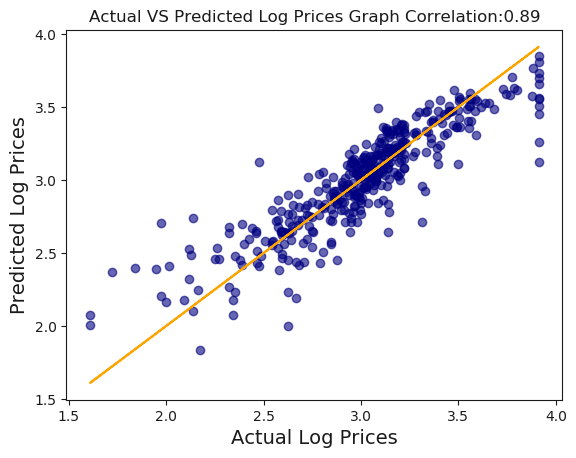

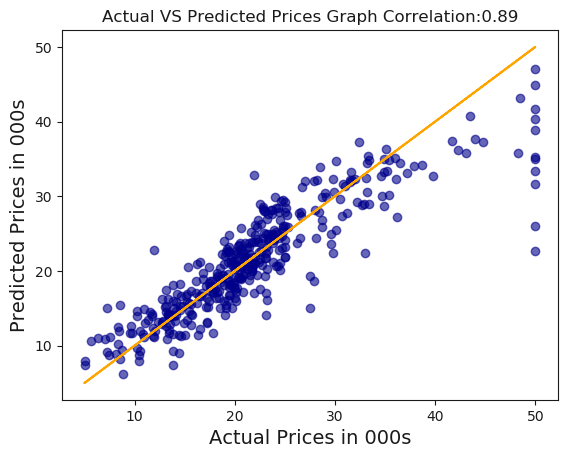

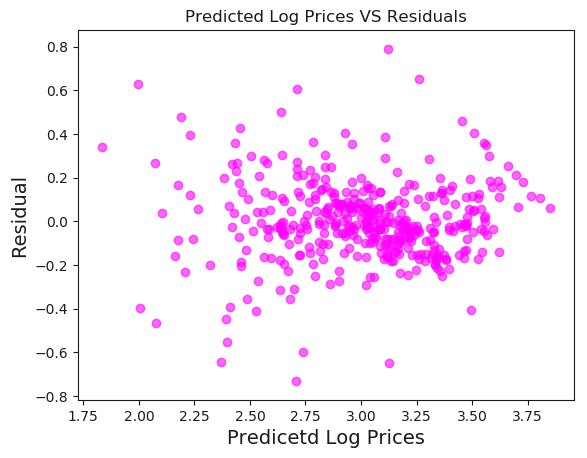

In [72]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['INDUS','PRICE','AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state = 10)

# Using Statsmodel
X_inc_cons = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_cons)
results = model.fit()

# Residuals
#results.resid

# Actual vs Predicted log Values Graph

corr = round(y_train.corr(results.fittedvalues),3)
#sns.set()
sns.reset_defaults()
plt.scatter(x=y_train,y=results.fittedvalues,color='navy',alpha=0.6)
plt.plot(y_train,y_train,color='orange')
plt.xlabel("Actual Log Prices",fontsize=14)
plt.ylabel("Predicted Log Prices",fontsize=14)
plt.title(f"Actual VS Predicted Log Prices Graph Correlation:{corr}")
plt.show()

# Actual vs Predicted Values Graph
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,color='darkblue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='orange')
plt.xlabel("Actual Prices in 000s",fontsize=14)
plt.ylabel("Predicted Prices in 000s",fontsize=14)
plt.title(f"Actual VS Predicted Prices Graph Correlation:{corr}")
plt.show()

# Predicted Values VS Residual Plot
plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,color='magenta')
plt.xlabel("Predicetd Log Prices",fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.title("Predicted Log Prices VS Residuals")
plt.show()




C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


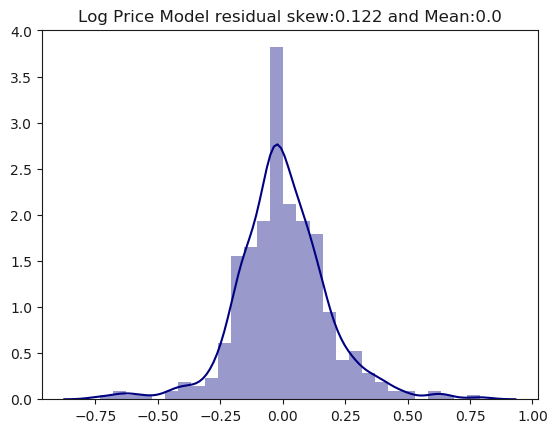

In [78]:
resid_mse = round(results.mse_resid,3)
resid_rsquared = round(results.rsquared,3)
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid,color='navy')
plt.title(f"Log Price Model residual skew:{resid_skew} and Mean:{resid_mean}")
plt.show()




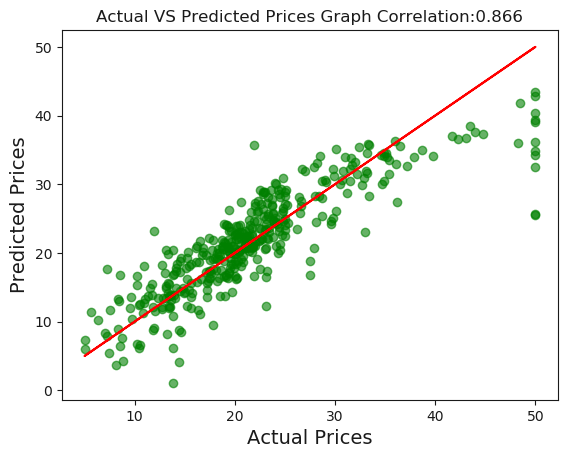

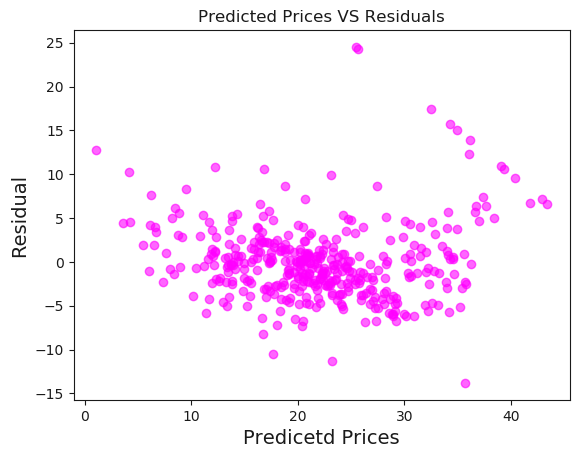

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


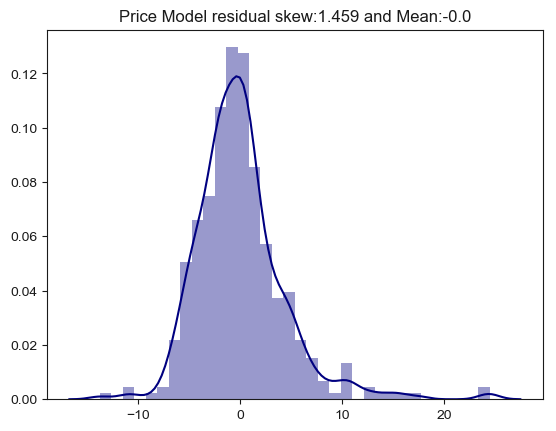

In [88]:
#Original Model Normal Price and all features
prices = data['PRICE']
features = data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

X_inc_cons = sm.add_constant(X_train)
results = sm.OLS(y_train,X_inc_cons).fit()

# Actual vs Predicted Values Graph

corr = round(y_train.corr(results.fittedvalues),3)
#sns.set()
sns.reset_defaults()
plt.scatter(x=y_train,y=results.fittedvalues,color='green',alpha=0.6)
plt.plot(y_train,y_train,color='red')
plt.xlabel("Actual Prices",fontsize=14)
plt.ylabel("Predicted Prices",fontsize=14)
plt.title(f"Actual VS Predicted Prices Graph Correlation:{corr}")
plt.show()

# Plot of Residual vs Pridicted Prices

plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,color='magenta')
plt.xlabel("Predicetd Prices",fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.title("Predicted Prices VS Residuals")
plt.show()

# Residual Distribution Chart
resid_mse_nor = round(results.mse_resid,3)
resid_rsquared_nor = round(results.rsquared,3)
resid_mean_nor = round(results.resid.mean(),3)
resid_skew_nor = round(results.resid.skew(),3)

sns.distplot(results.resid,color='navy')
sns.set_style('whitegrid')
plt.title(f"Price Model residual skew:{resid_skew_nor} and Mean:{resid_mean_nor}")
plt.show()


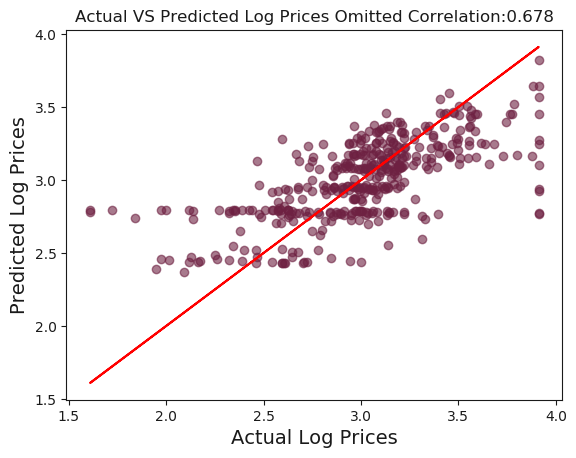

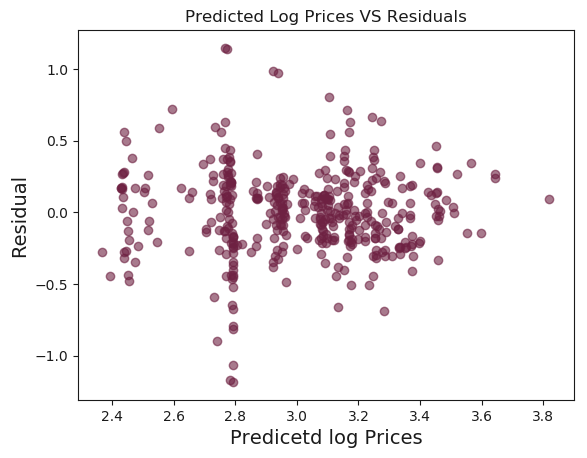

In [93]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['INDUS','PRICE','AGE','LSTAT','RM','NOX','CRIM'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state = 10)

# Using Statsmodel
X_inc_cons = sm.add_constant(X_train)
model = sm.OLS(y_train,X_inc_cons)
results = model.fit()

# Actual vs Predicted Values Graph

corr = round(y_train.corr(results.fittedvalues),3)
#sns.set()
sns.reset_defaults()
plt.scatter(x=y_train,y=results.fittedvalues,color='#6e2142',alpha=0.6)
plt.plot(y_train,y_train,color='red')
plt.xlabel("Actual Log Prices",fontsize=14)
plt.ylabel("Predicted Log Prices",fontsize=14)
plt.title(f"Actual VS Predicted Log Prices Omitted Correlation:{corr}")
plt.show()

# Plot of Residual vs Pridicted Prices

plt.scatter(x=results.fittedvalues,y=results.resid,alpha=0.6,color='#6e2142')
plt.xlabel("Predicetd log Prices",fontsize=14)
plt.ylabel("Residual",fontsize=14)
plt.title("Predicted Log Prices VS Residuals")
plt.show()

resid_mse_omit = round(results.mse_resid,3)
resid_rsquared_omit = round(results.rsquared,3)
resid_mean_omit = round(results.resid.mean(),3)
resid_skew_omit = round(results.resid.skew(),3)



In [96]:
pd.DataFrame({'R-squared':[resid_rsquared,resid_rsquared_nor,resid_rsquared_omit],
              'MSE':[resid_mse,resid_mse_nor,resid_mse_omit],
             'RMSE':np.sqrt([resid_mse,resid_mse_nor,resid_mse_omit])},
             index=['Reduced Log Model','Full normal Price Model','Omitted Values Model'])

R-squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full normal Price Model      0.750  19.919  4.463071
Omitted Values Model         0.460   0.090  0.300000